# Part 7: Logistic Regression

We train here a Logisic Regression model. We don't really know what to expect from it in terms of performance compared to the Decision Tree and Random Forest. Let's find out. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sys
sys.path.append("..")

In [3]:
from codes.functions import load_data

X_tr, X_te, y_tr, y_te = load_data()

## A. Without PCA

We will use for the GridSearch and fine tune the following hyper-parameter: the strategy (one-vs.-rest or softmax) and $C$, the inverse of the regularization parameter. For both strategies, we will use the solver `sag`. Indeed, according to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), it is more convenient to use this solver when working on bigger datasets.

We have seen that we need to standardize our data before fitting any model, that is why we call StandardScaler in our Pipeline. 

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(
    [ 
        ("scaler", StandardScaler()), 
        ("logreg", LogisticRegression(max_iter=10000,
                                     tol= 1e-2, 
                                     solver = "sag"))
    ]
)

C = np.logspace(-5,5,11)
strategy = ["multinomial", "ovr"]
weight = [None, "balanced"]

grid = [
    {
        "logreg__C": C, 
        "logreg__multi_class": strategy,
        "logreg__class_weight": weight
    }
]
    
gs = GridSearchCV(pipeline,
                  grid,
                  cv = 5,
                  refit = True, 
                  return_train_score = True, 
                  n_jobs = -1,)

In [5]:
gs.fit(X_tr, y_tr);

In [6]:
from codes.functions import show_results

results = show_results(gs, grid)
results.sort_values(by="mean validation score", ascending = False)

,logreg__C,logreg__multi_class,logreg__class_weight,mean validation score,std validation score,mean train score,std train score
16,0.1,multinomial,None,0.695741,0.019376,0.707701,0.005379
12,0.01,multinomial,None,0.695650,0.019495,0.707230,0.005343
40,100000.0,multinomial,None,0.695599,0.019603,0.707681,0.005364
28,100.0,multinomial,None,0.695599,0.019603,0.707678,0.005369
36,10000.0,multinomial,None,0.695599,0.019603,0.707681,0.005368
32,1000.0,multinomial,None,0.695599,0.019603,0.707682,0.005371
20,1.0,multinomial,None,0.695599,0.019527,0.707670,0.005360
24,10.0,multinomial,None,0.695584,0.019593,0.707684,0.005369
8,0.001,multinomial,None,0.694796,0.021084,0.705109,0.005192
25,10.0,ovr,None,0.688274,0.021505,0.699033,0.005142


The best strategy in our case is the softmax one. Let see the validation and training curves.

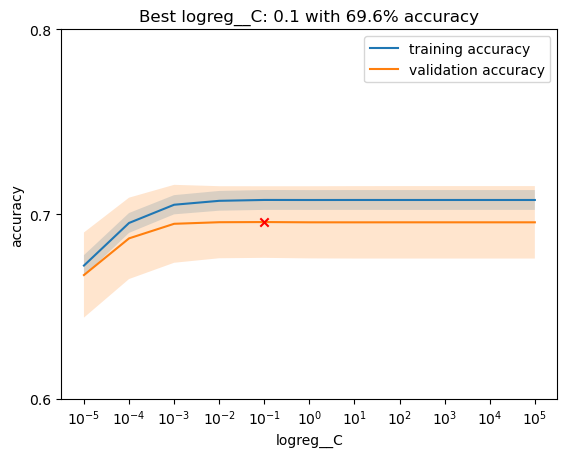

In [7]:
from codes.functions import show_curves

show_curves(results, grid, "logreg__C",
            plot = False,
            yticks = np.arange(0.6,0.8,0.1),
            mask = (results["logreg__multi_class"] == "multinomial") & (results["logreg__class_weight"].isna())
           )

Since the training and validation curves don't diverge, there is no risk of overfitting with this model. But we see that increasing the $C$ parameter from the value $10^{-2}$ doesn't increase either the performance. 

We recall that the $C$ parameter is the inverse of the regularization strength. The more we set a high value for $C$, the weaker the regularization and inversely the smaller is $C$, the stronger the regularization. This means that a $C$ value of 0.01 allows a certain regularization but which is not as that strong. This invits us to explore a Logistic Regression without regularization parameter tuning. 

In [8]:
pipeline = Pipeline(
    [ 
        ("scaler", StandardScaler()), 
        ("logreg", LogisticRegression(max_iter=10000,
                                     tol= 1e-2, 
                                     solver = "sag", 
                                     penalty = "none"))
    ]
)

strategy = ["multinomial", "ovr"]

grid = [
     {"logreg__multi_class": strategy}
]

gs_2 = GridSearchCV(pipeline,
                      grid,
                      cv = 10,
                      refit = True, 
                      return_train_score = True, 
                      n_jobs = -1,)

In [9]:
gs_2.fit(X_tr, y_tr);

In [10]:
show_results(gs_2, grid)

,logreg__multi_class,mean validation score,std validation score,mean train score,std train score
0,multinomial,0.693598,0.033420,0.707175,0.003725
1,ovr,0.684917,0.033206,0.698684,0.003534


The best strategy is still the softmax one, but its validation accuracy is comparable to the ones of the models allowing a penalisation term.

As the validation accuracy of the best model given by the first grid search is a bit higher (but very, very slightly) than this one, we keep the model when $C=0.01$.

## B. With PCA

We want to check if the performance of the Logistic Regression can increase when reducing the dimension of our data. As we did in the previous parts, we start by taking `pca_small` the shortest list containing different number of principal components. As we are applying a grid search this time on more parameters, we start by take a shorter range of values for $C$ and set the number of folds to 5.

In [11]:
from sklearn.decomposition import PCA

pipeline = Pipeline(
    [ 
        ("scaler", StandardScaler()), 
        ("pca", PCA()),
        ("logreg", LogisticRegression(max_iter=10000,
                                      tol= 1e-2, 
                                      solver = "sag"))
    ]
)

pca_small = np.load("../scores & pca components/pca_components_small.npy")
strategies = ["multinomial", "ovr"]
C = np.logspace(-3,3,7)

grids = [
    {"pca__n_components": pca_small, "logreg__penalty": ["none"], "logreg__multi_class": strategies},
    {"pca__n_components": pca_small, "logreg__penalty": ["l2"], "logreg__multi_class": strategies, "logreg__C": C}
]

gs_pca = GridSearchCV(pipeline,
                      grids,
                      cv = 5,
                      refit = True, 
                      return_train_score = True, 
                      n_jobs = -1)

In [12]:
gs_pca.fit(X_tr, y_tr);

/Users/paulmellet/miniconda3/envs/adsml/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [13]:
show_results(gs_pca, [grids[1]]).sort_values(by="mean validation score", ascending = False)[:15]

,pca__n_components,logreg__penalty,logreg__multi_class,logreg__C,mean validation score,std validation score,mean train score,std train score
24,40,l2,multinomial,0.01,0.694375,0.020558,0.705386,0.005337
54,40,l2,multinomial,10.0,0.694294,0.020466,0.705537,0.005384
74,40,l2,multinomial,1000.0,0.694273,0.020417,0.705609,0.005336
4,40,none,multinomial,NaN,0.694243,0.020431,0.705589,0.005355
44,40,l2,multinomial,1.0,0.694228,0.020427,0.705569,0.005380
64,40,l2,multinomial,100.0,0.694187,0.020410,0.705581,0.005367
34,40,l2,multinomial,0.1,0.694182,0.020295,0.705577,0.005399
14,40,l2,multinomial,0.001,0.694101,0.021387,0.703888,0.005545
49,40,l2,ovr,1.0,0.687324,0.021760,0.697774,0.005360
59,40,l2,ovr,10.0,0.687309,0.021620,0.697738,0.005376


Choosing the softmax regression and 40 principal components is better. But the pattern of the other parameters stays unclear. 

Let's refine our search making the range of $C$ values a bit wider, increase the number of folds and allow again our grid-search wether add the penalty term or not.

In [14]:
pipeline = Pipeline(
    [ 
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components = 40)),
        ("logreg", LogisticRegression(max_iter=10000,
                                      tol= 1e-2, 
                                      solver = "sag",
                                      multi_class = "multinomial"))
    ]
)

C = np.logspace(-5,5,11)

grids = [
    {"logreg__penalty": ["none"]},
    {"logreg__penalty": ["l2"], "logreg__C": C}
]

gs_pca_2 = GridSearchCV(pipeline,
                      grids,
                      cv = 10,
                      refit = True, 
                      return_train_score = True, 
                      n_jobs = -1)

In [15]:
gs_pca_2.fit(X_tr, y_tr);

In [16]:
show_results(gs_pca_2, [grids[1]]).sort_values(by = "mean validation score", ascending = False)

,logreg__penalty,logreg__C,mean validation score,std validation score,mean train score,std train score
5,l2,0.1,0.692150,0.033640,0.705036,0.003795
11,l2,100000.0,0.692074,0.033682,0.705035,0.003830
8,l2,100.0,0.692049,0.033748,0.705052,0.003826
9,l2,1000.0,0.692028,0.033722,0.705049,0.003833
7,l2,10.0,0.692028,0.033694,0.705049,0.003813
6,l2,1.0,0.692028,0.033648,0.705061,0.003823
10,l2,10000.0,0.692018,0.033669,0.705046,0.003820
0,none,NaN,0.691993,0.033757,0.705057,0.003835
4,l2,0.01,0.691922,0.033996,0.704872,0.003839
3,l2,0.001,0.691612,0.034115,0.703462,0.003826


Finally we still see that using regularization is slightly better than avoiding it. 

Overall, the model with $C=0.01$ output by the first grid search was the one with the highest validation accuracy over all the others we have fit. We predict our test data using this one. 

In [17]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled = scaler.transform(X_te)

logreg = LogisticRegression(multi_class = "multinomial",
                            C = 0.01,
                            max_iter = 10000,
                            tol = 1e-2,
                            solver = "sag")

logreg.fit(X_tr_scaled, y_tr);

y_logreg = logreg.predict(X_te_scaled)
acc_logreg = logreg.score(X_te_scaled, y_te)


In [18]:
print("The test accuracy of our model is: {}%".format(round(acc_logreg,3)*100))

The test accuracy of our model is: 70.7%


That is the most performant model we have train so far. 

## C. Communication of the results

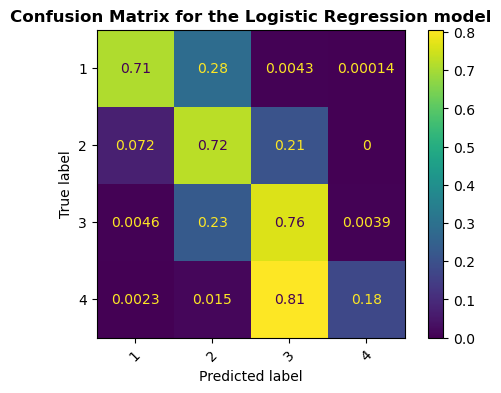

In [19]:
from codes.functions import class_report, confusion_matrix

confusion_matrix(y_te, y_logreg, "Logistic Regression")

It's the first model to predict the danger 4 to some data points, even if the majority of observations with danger level 4 are classes in the danger level 3 class. Also, appart from the fourth category, the logisic regression labels most of the time correctly as the probability of correct labelling for each class is higher that falsly labelling.

In [20]:
class_report(y_te, y_logreg)

              precision    recall  f1-score   support

           1       0.83      0.71      0.77      7391
           2       0.67      0.72      0.69     13699
           3       0.69      0.76      0.72     12292
           4       0.86      0.18      0.29      1759

    accuracy                           0.71     35141
   macro avg       0.76      0.59      0.62     35141
weighted avg       0.72      0.71      0.70     35141



This observation is confirmed when looking at this classification report, the macro f-1 is the highest one with its score at 0.63.

## D. Save the test accuracy

In [23]:
np.save("../scores & pca components/acc_logreg", acc_logreg)